# CNN 이진분류 (컬러이미지)
- 개와고양이 데이터셋

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

time: 287 µs (started: 2024-09-12 07:48:47 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 4.22 s (started: 2024-09-12 07:48:47 +00:00)


## 1.데이터 준비

In [3]:
!gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

Downloading...
From (original): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR
From (redirected): https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR&confirm=t&uuid=cd8229d0-e792-43c1-8a8d-d1c334f08773
To: /content/cats_and_dogs.zip
100% 68.6M/68.6M [00:03<00:00, 22.3MB/s]
time: 8.24 s (started: 2024-09-12 07:48:51 +00:00)


In [4]:
!unzip /content/cats_and_dogs.zip

Archive:  /content/cats_and_dogs.zip
   creating: cats_and_dogs/
   creating: cats_and_dogs/test/
   creating: cats_and_dogs/test/cats/
  inflating: cats_and_dogs/test/cats/cat.2300.jpg  
  inflating: cats_and_dogs/test/cats/cat.2301.jpg  
  inflating: cats_and_dogs/test/cats/cat.2302.jpg  
  inflating: cats_and_dogs/test/cats/cat.2303.jpg  
  inflating: cats_and_dogs/test/cats/cat.2304.jpg  
  inflating: cats_and_dogs/test/cats/cat.2305.jpg  
  inflating: cats_and_dogs/test/cats/cat.2306.jpg  
  inflating: cats_and_dogs/test/cats/cat.2307.jpg  
  inflating: cats_and_dogs/test/cats/cat.2308.jpg  
  inflating: cats_and_dogs/test/cats/cat.2309.jpg  
  inflating: cats_and_dogs/test/cats/cat.2310.jpg  
  inflating: cats_and_dogs/test/cats/cat.2311.jpg  
  inflating: cats_and_dogs/test/cats/cat.2312.jpg  
  inflating: cats_and_dogs/test/cats/cat.2313.jpg  
  inflating: cats_and_dogs/test/cats/cat.2314.jpg  
  inflating: cats_and_dogs/test/cats/cat.2315.jpg  
  inflating: cats_and_dogs/test/

In [5]:
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

print(train_dir)
print(test_dir)

/content/cats_and_dogs/train
/content/cats_and_dogs/test
time: 545 µs (started: 2024-09-12 07:49:00 +00:00)


### 데이터 로딩

In [6]:
class_name = ['cats', 'dogs']

time: 292 µs (started: 2024-09-12 07:49:00 +00:00)


In [7]:
import os

train_cats_fnames = os.listdir(train_dir + '/cats')
train_dogs_fnames = os.listdir(train_dir + '/dogs')

time: 2.49 ms (started: 2024-09-12 07:49:00 +00:00)


In [8]:
import PIL

X_train = []
y_train = []

for fname in train_cats_fnames:
    image = PIL.Image.open(train_dir + '/cats/' + fname)
    image = image.resize((224, 224)) # 각각의 사진의 크기가 다르므로 224 224로 맞춰준다
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

len(X_train), len(y_train)

(1300, 1300)

time: 4.38 s (started: 2024-09-12 07:49:00 +00:00)


In [9]:
for fname in train_dogs_fnames:
    image = PIL.Image.open(train_dir + '/dogs/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

len(X_train), len(y_train)

(2600, 2600)

time: 4.8 s (started: 2024-09-12 07:49:04 +00:00)


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2600, 224, 224, 3) (2600,)
time: 118 ms (started: 2024-09-12 07:49:09 +00:00)


## 2.학습, 검증 데이터 분리

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  shuffle=True,
                                                  random_state=42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(2080, 224, 224, 3) (520, 224, 224, 3)
(2080,) (520,)
time: 365 ms (started: 2024-09-12 07:49:09 +00:00)


In [12]:
X_train.shape

(2080, 224, 224, 3)

time: 2.46 ms (started: 2024-09-12 07:49:10 +00:00)


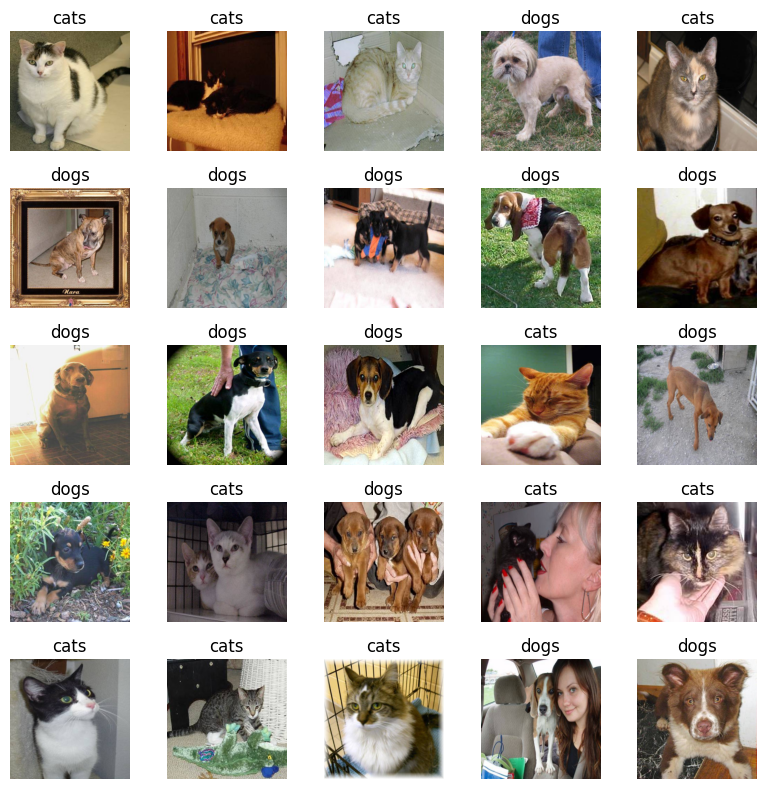

time: 1.85 s (started: 2024-09-12 07:49:10 +00:00)


In [13]:
# np.random.seed(42)
sample = np.random.randint(2080, size=25)

fig = plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
fig.tight_layout()
plt.show()

## 3.전처리

In [14]:
X_train_s = X_train.astype('float')/255.
X_val_s = X_val.astype('float')/255.

time: 1.08 s (started: 2024-09-12 07:49:12 +00:00)


## 4. 모델

In [15]:
from keras.applications import vgg16 # 전이 학습~~

base_model = vgg16.VGG16(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3))

base_model.trainable = False # 기존에 있는 그대로  사용하겠다는 소리; 추가로 학습하지 않음
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

time: 1.68 s (started: 2024-09-12 07:49:13 +00:00)


In [22]:
from keras import layers

model = keras.Sequential()
model.add(base_model)
model.add(layers.Flatten())  # (7*7*512 = 25088) 크기로 변환
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))  # 이진 분류

# model.summary()

time: 13.3 ms (started: 2024-09-12 07:59:50 +00:00)


In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

time: 11.5 ms (started: 2024-09-12 07:59:55 +00:00)


In [24]:
epochs = 20
batch_size = 32

history = model.fit(
    X_train_s, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_s, y_val)
)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.6028 - loss: 1.6530 - val_accuracy: 0.8615 - val_loss: 0.2965
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8805 - loss: 0.2911 - val_accuracy: 0.8788 - val_loss: 0.2951
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9213 - loss: 0.1947 - val_accuracy: 0.7712 - val_loss: 0.6465
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8940 - loss: 0.2465 - val_accuracy: 0.9115 - val_loss: 0.2979
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9693 - loss: 0.0815 - val_accuracy: 0.9000 - val_loss: 0.2436
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9595 - loss: 0.1040 - val_accuracy: 0.8500 - val_loss: 0.5694
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9708 - loss: 0.0733 - val_accuracy: 0.9212 - val_loss: 0.3298
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9923 - loss: 0.0312 - val_accuracy: 0.9154 -

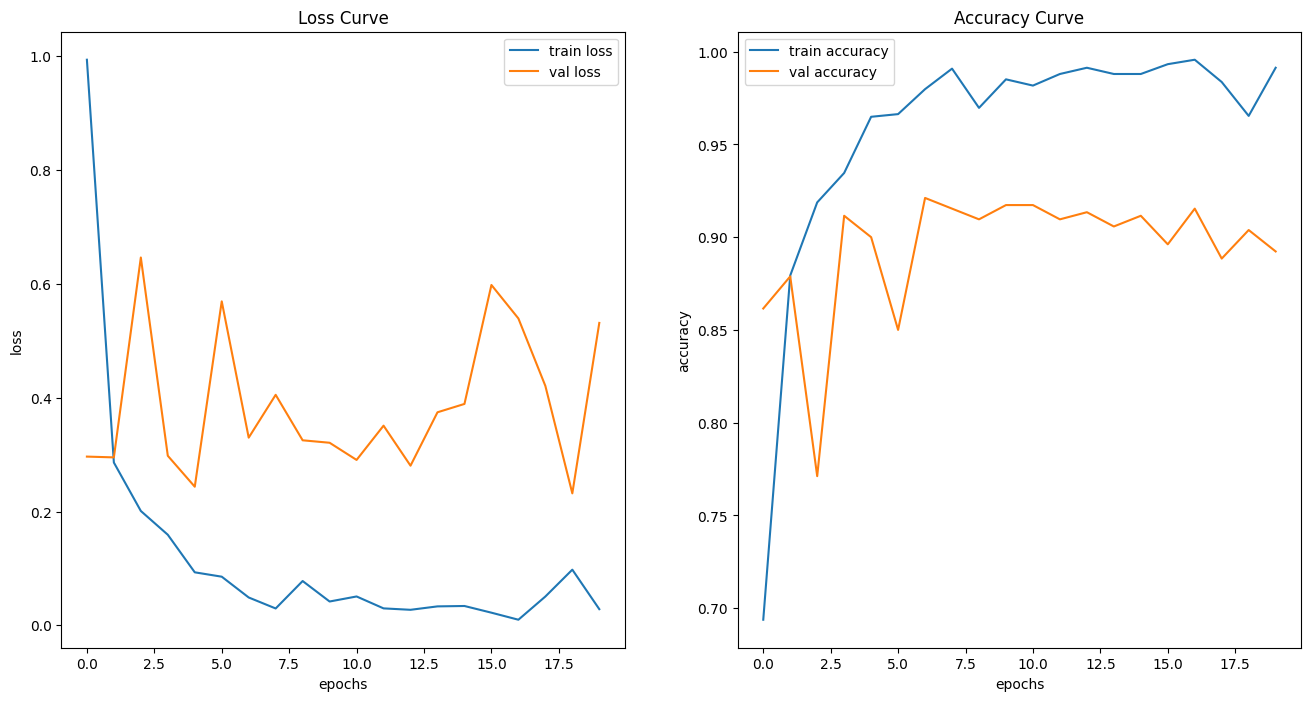

time: 448 ms (started: 2024-09-12 08:00:56 +00:00)


In [25]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

## 평가

In [30]:
test_cats_fnames = os.listdir(test_dir + '/cats')
test_dogs_fnames = os.listdir(test_dir + '/dogs')

time: 1.48 ms (started: 2024-09-12 08:04:38 +00:00)


In [31]:
X_test = []
y_test = []

for fname in test_cats_fnames:
    image = PIL.Image.open(test_dir + '/cats/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(0)

len(X_test), len(y_test)

(200, 200)

time: 629 ms (started: 2024-09-12 08:04:56 +00:00)


In [32]:
for fname in test_dogs_fnames:
    image = PIL.Image.open(test_dir + '/dogs/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_test.append(arr)
    y_test.append(1)

len(X_test), len(y_test)

(400, 400)

time: 667 ms (started: 2024-09-12 08:05:08 +00:00)


In [33]:
# 형태를 array로 바꿔줌
X_test = np.array(X_test)
y_test = np.array(y_test)

print(type(X_test), type(y_test))
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400, 224, 224, 3) (400,)
time: 20.3 ms (started: 2024-09-12 08:05:23 +00:00)


In [34]:
X_test_s = X_test.astype('float')/255.
X_test_s.shape

(400, 224, 224, 3)

time: 167 ms (started: 2024-09-12 08:05:36 +00:00)


In [36]:
# test

y_pred = model.predict(X_test_s)
y_pred = np.where(y_pred > 0.5, 1, 0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step
time: 4.73 s (started: 2024-09-12 08:07:11 +00:00)


accuracy: 0.895
recall: 0.895
precision: 0.9040920716112533
f1 : 0.8944060339409177


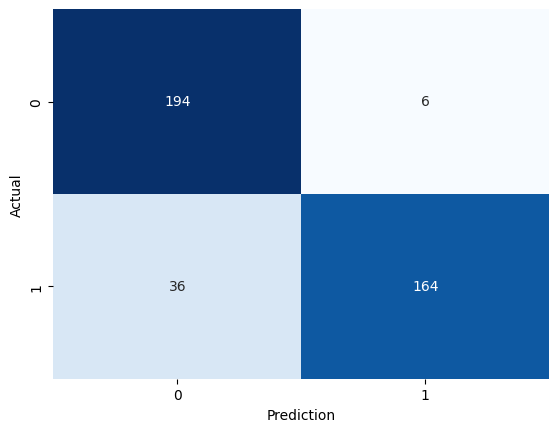

time: 101 ms (started: 2024-09-12 08:07:18 +00:00)


In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

print_metrics(y_test, y_pred, aver='macro')